In [432]:
import pandas as pd
import seaborn as sns
from IPython.display import display

In [433]:
from sklearn.preprocessing import LabelEncoder

In [434]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [435]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [436]:
df = pd.read_csv('datos_apartamentos_rent.csv', encoding='ISO-8859-1', on_bad_lines='skip', delimiter=';')
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [437]:
for col in df.columns:
    columna = col
    unique_values = df[columna].value_counts().reset_index()
    unique_values.columns = [columna, 'count']
    display(unique_values)


,id,count
0,5668637541,1
1,5668627076,1
2,5642368363,1
3,5668629508,1
4,5664597936,1
...,...,...
9995,5668626759,1
9996,5659918074,1
9997,5668626833,1
9998,5664597177,1


,category,count
0,housing/rent/apartment,9996
1,housing/rent/home,2
2,housing/rent/short_term,2


,title,count
0,Apartment in great location,40
1,Super Cute! Apartment for Rent!,32
2,Apartment in prime location,31
3,This Apartment is a must see!,27
4,"Apartment in quiet area, spacious with big kit...",26
...,...,...
9345,Four BR 1602 Greenwood Drive,1
9346,Four BR 5972 VALLEY MEADOW CT,1
9347,Four BR 1308 E. Atwater Ave,1
9348,Five BR 16411 Jadestone Terrace Ln,1


,body,count
0,"When searching for a pet-friendly One-, Two- a...",6
1,"If you re looking to lease your new home, you ...",4
2,Just minutes away from the big city life of Ph...,3
3,"At the in Lawrenceville, you can count on our ...",2
4,You ve found your to the ultimate in luxurious...,2
...,...,...
9956,"This unit is located at 1602 Greenwood Drive, ...",1
9957,"This unit is located at 5972 VALLEY MEADOW CT,...",1
9958,"This unit is located at 1308 E. Atwater Ave, B...",1
9959,This unit is located at 16411 Jadestone Terrac...,1


,amenities,count
0,Parking,229
1,"Dishwasher,Refrigerator",225
2,Pool,171
3,"Dishwasher,Parking,Pool",149
4,Dishwasher,147
...,...,...
2249,"Cable or Satellite,Dishwasher,Fireplace,Parkin...",1
2250,"Dishwasher,Garbage Disposal,Patio/Deck,Playgro...",1
2251,"Gym,Playground,Pool,Washer Dryer",1
2252,"AC,Cable or Satellite,Dishwasher,Garbage Dispo...",1


,bathrooms,count
0,1.0,6639
1,2.0,2418
2,2.5,315
3,1.5,282
4,3.0,174
5,3.5,66
6,4.0,46
7,4.5,12
8,5.0,8
9,7.0,2


,bedrooms,count
0,1.0,4607
1,2.0,3398
2,3.0,1276
3,4.0,404
4,0.0,198
5,5.0,89
6,6.0,15
7,7.0,3
8,8.0,2
9,9.0,1


,currency,count
0,USD,10000


,fee,count
0,No,10000


,has_photo,count
0,Thumbnail,8907
1,Yes,909
2,No,184


,pets_allowed,count
0,"Cats,Dogs",5228
1,Cats,485
2,Dogs,124


,price,count
0,1350,86
1,1250,81
2,850,79
3,1100,77
4,1400,74
...,...,...
1720,2590,1
1721,2370,1
1722,5765,1
1723,6850,1


,price_display,count
0,"$1,350",86
1,"$1,250",81
2,$850,79
3,"$1,100",77
4,"$1,400",74
...,...,...
1721,"$2,590",1
1722,"$2,370",1
1723,"$5,765",1
1724,"$6,850",1


,price_type,count
0,Monthly,9998
1,Weekly,1
2,Monthly|Weekly,1


,square_feet,count
0,700,189
1,800,161
2,600,154
3,900,148
4,750,139
...,...,...
1733,215,1
1734,101,1
1735,5199,1
1736,5407,1


,address,count
0,901 Hidden Valley Drive,3
1,908 8th SW St,3
2,500 Sleepy Hollow Rd,3
3,7319 N Loop 1604 E,2
4,110 Central Avenue,2
...,...,...
6653,18605 Ave,1
6654,2536 W Canyon Ridge Road,1
6655,5407 Abbott Place Abbott,1
6656,256 Las Entradas,1


,cityname,count
0,Austin,523
1,Dallas,216
2,Houston,186
3,San Antonio,182
4,Los Angeles,165
...,...,...
1569,Bradley,1
1570,Paris,1
1571,Mission Viejo,1
1572,Menlo Park,1


,state,count
0,TX,1737
1,CA,955
2,WA,519
3,NC,438
4,MD,424
5,NJ,383
6,GA,372
7,FL,339
8,OH,321
9,CO,318


,latitude,count
0,30.3054,512
1,29.7714,176
2,29.4624,176
3,41.8625,139
4,43.0724,118
...,...,...
2390,45.2763,1
2391,32.5879,1
2392,35.7626,1
2393,33.5146,1


,longitude,count
0,-97.7497,512
1,-98.5253,176
2,-95.4343,176
3,-87.6825,139
4,-89.4003,118
...,...,...
2387,-70.3461,1
2388,-120.9626,1
2389,-76.4593,1
2390,-123.0194,1


,source,count
0,RentLingo,6912
1,RentDigs.com,2764
2,ListedBuy,179
3,RealRentals,69
4,GoSection8,31
5,Listanza,23
6,RENTOCULAR,16
7,rentbits,2
8,Home Rentals,1
9,Real Estate Agent,1


,time,count
0,1577359251,5
1,1577359489,5
2,1577016866,5
3,1576667596,4
4,1577015539,4
...,...,...
6305,1577360551,1
6306,1576322215,1
6307,1577289784,1
6308,1577362186,1


In [438]:
# Eliminar columnas en las que los datos no varían
df = df.drop(['id','currency', 'fee','title','body','category','price_display','price_type'], axis=1)
df.head()

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,address,cityname,state,latitude,longitude,source,time
0,NaN,NaN,0.0,Thumbnail,NaN,790,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,NaN,NaN,1.0,Thumbnail,NaN,425,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,NaN,1.0,0.0,Thumbnail,NaN,1390,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,NaN,1.0,0.0,Thumbnail,NaN,925,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,NaN,NaN,0.0,Thumbnail,NaN,880,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


#### Se eliminaron las variables 'id','currency', 'fee','title','body','category','price_display' ya que no representaban variabilidad significativa en los datos.

In [439]:
# Contar cuantos baños hay con valores decimales
df['bathrooms'].apply(lambda x: isinstance(x, float) and x % 1 != 0).sum()

np.int64(711)

In [440]:
df.shape

(10000, 14)

In [441]:
df.describe()

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


### Análisis de valores nulos en variables numéricas

### Las columnas que más NAs presentan entre las variables numéricas son Latitude y Longitude con 10 NA respectivamente. Se eliminarán las filas del data frame con valores nulos asociados a variables numéricas ya que representan menos del 0.5% de la información en cada caso

In [442]:
# Variables numéricas
columnas_numericas = ['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude', 'time']

# Contar valores nulos por cada columna en la lista
null_values = df[columnas_numericas].isna().sum()
display(null_values)


bathrooms      34
bedrooms        7
price           0
square_feet     0
latitude       10
longitude      10
time            0
dtype: int64

### Se eliminarán los data points con valores nulos

In [443]:
df = df[df['bathrooms'].notna()]
df = df[df['bedrooms'].notna()]
df = df[df['latitude'].notna()]
df = df[df['longitude'].notna()]

In [444]:
df.shape

(9950, 14)

In [445]:
df.describe()

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9.950000e+03
mean,1.380553,1.747538,1487.585930,943.271055,37.696104,-94.663883,1.574881e+09
std,0.615313,0.941543,1077.350394,526.416278,5.501219,15.760136,3.767608e+06
min,1.000000,0.000000,200.000000,107.000000,21.315500,-158.022100,1.568744e+09
25%,1.000000,1.000000,950.000000,650.000000,33.679500,-101.301700,1.568781e+09
50%,1.000000,2.000000,1275.000000,803.000000,38.809600,-93.651600,1.577358e+09
75%,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.302000,1.577359e+09
max,8.500000,9.000000,52500.000000,11318.000000,61.594000,-70.191600,1.577362e+09


### Análisis de valores nulos en variables categóricas

In [446]:
# Excluir variables numéricas y las de la lista columnas_interes
columnas_excluir = set(columnas_numericas)  # Convertimos la lista en un conjunto para mayor eficiencia

# Filtrar columnas no numéricas y que no estén en columnas_interes
columnas_cualitativas = [col for col in df.columns if col not in columnas_excluir and not pd.api.types.is_numeric_dtype(df[col])]

# Mostrar las columnas cualitativas restantes
print("Columnas no numéricas y no incluidas en columnas_numericas:")
print(columnas_cualitativas)


Columnas no numéricas y no incluidas en columnas_numericas:
['amenities', 'has_photo', 'pets_allowed', 'address', 'cityname', 'state', 'source']


In [447]:

# Contar valores nulos por cada columna en la lista
null_values = df[columnas_cualitativas].isna().sum()
display(null_values)

amenities       3508
has_photo          0
pets_allowed    4130
address         3305
cityname          67
state             67
source             0
dtype: int64

### Teniendo en cuenta que, los valores nulos o vacíos en "amenities", "pets_allowed" y "address" son representativos respecto a la muestra total, se tratarán como una categoría más.

### Por otro lado, las filas del data frame con valores nulos para "cityname" o "state" serán eliminados

In [448]:
df = df[df['cityname'].notna()]
df = df[df['state'].notna()]

In [449]:
df['amenities'] = df["amenities"].fillna("noamenities")
df['pets_allowed'] = df["pets_allowed"].fillna("petsunknown")
df['address'] = df["address"].fillna("addressunknown")

In [450]:
df.shape

(9883, 14)

In [451]:
df.head()

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,address,cityname,state,latitude,longitude,source,time
2,noamenities,1.0,0.0,Thumbnail,petsunknown,1390,107,addressunknown,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,noamenities,1.0,0.0,Thumbnail,petsunknown,925,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
5,"Dishwasher,Elevator,Patio/Deck,Pool,Storage",1.0,0.0,Thumbnail,petsunknown,2475,130,350 West 50th St,Manhattan,NY,40.7629,-73.9885,Listanza,1577289784
8,Refrigerator,1.0,0.0,Thumbnail,petsunknown,1495,138,333 Hyde St,San Francisco,CA,37.7599,-122.4379,RentLingo,1577358313
14,Refrigerator,1.0,0.0,Thumbnail,petsunknown,1695,190,57 Taylor St,San Francisco,CA,37.7599,-122.4379,RentLingo,1577015121


### Histogramas y dispersión de los datos

In [452]:
%matplotlib inline

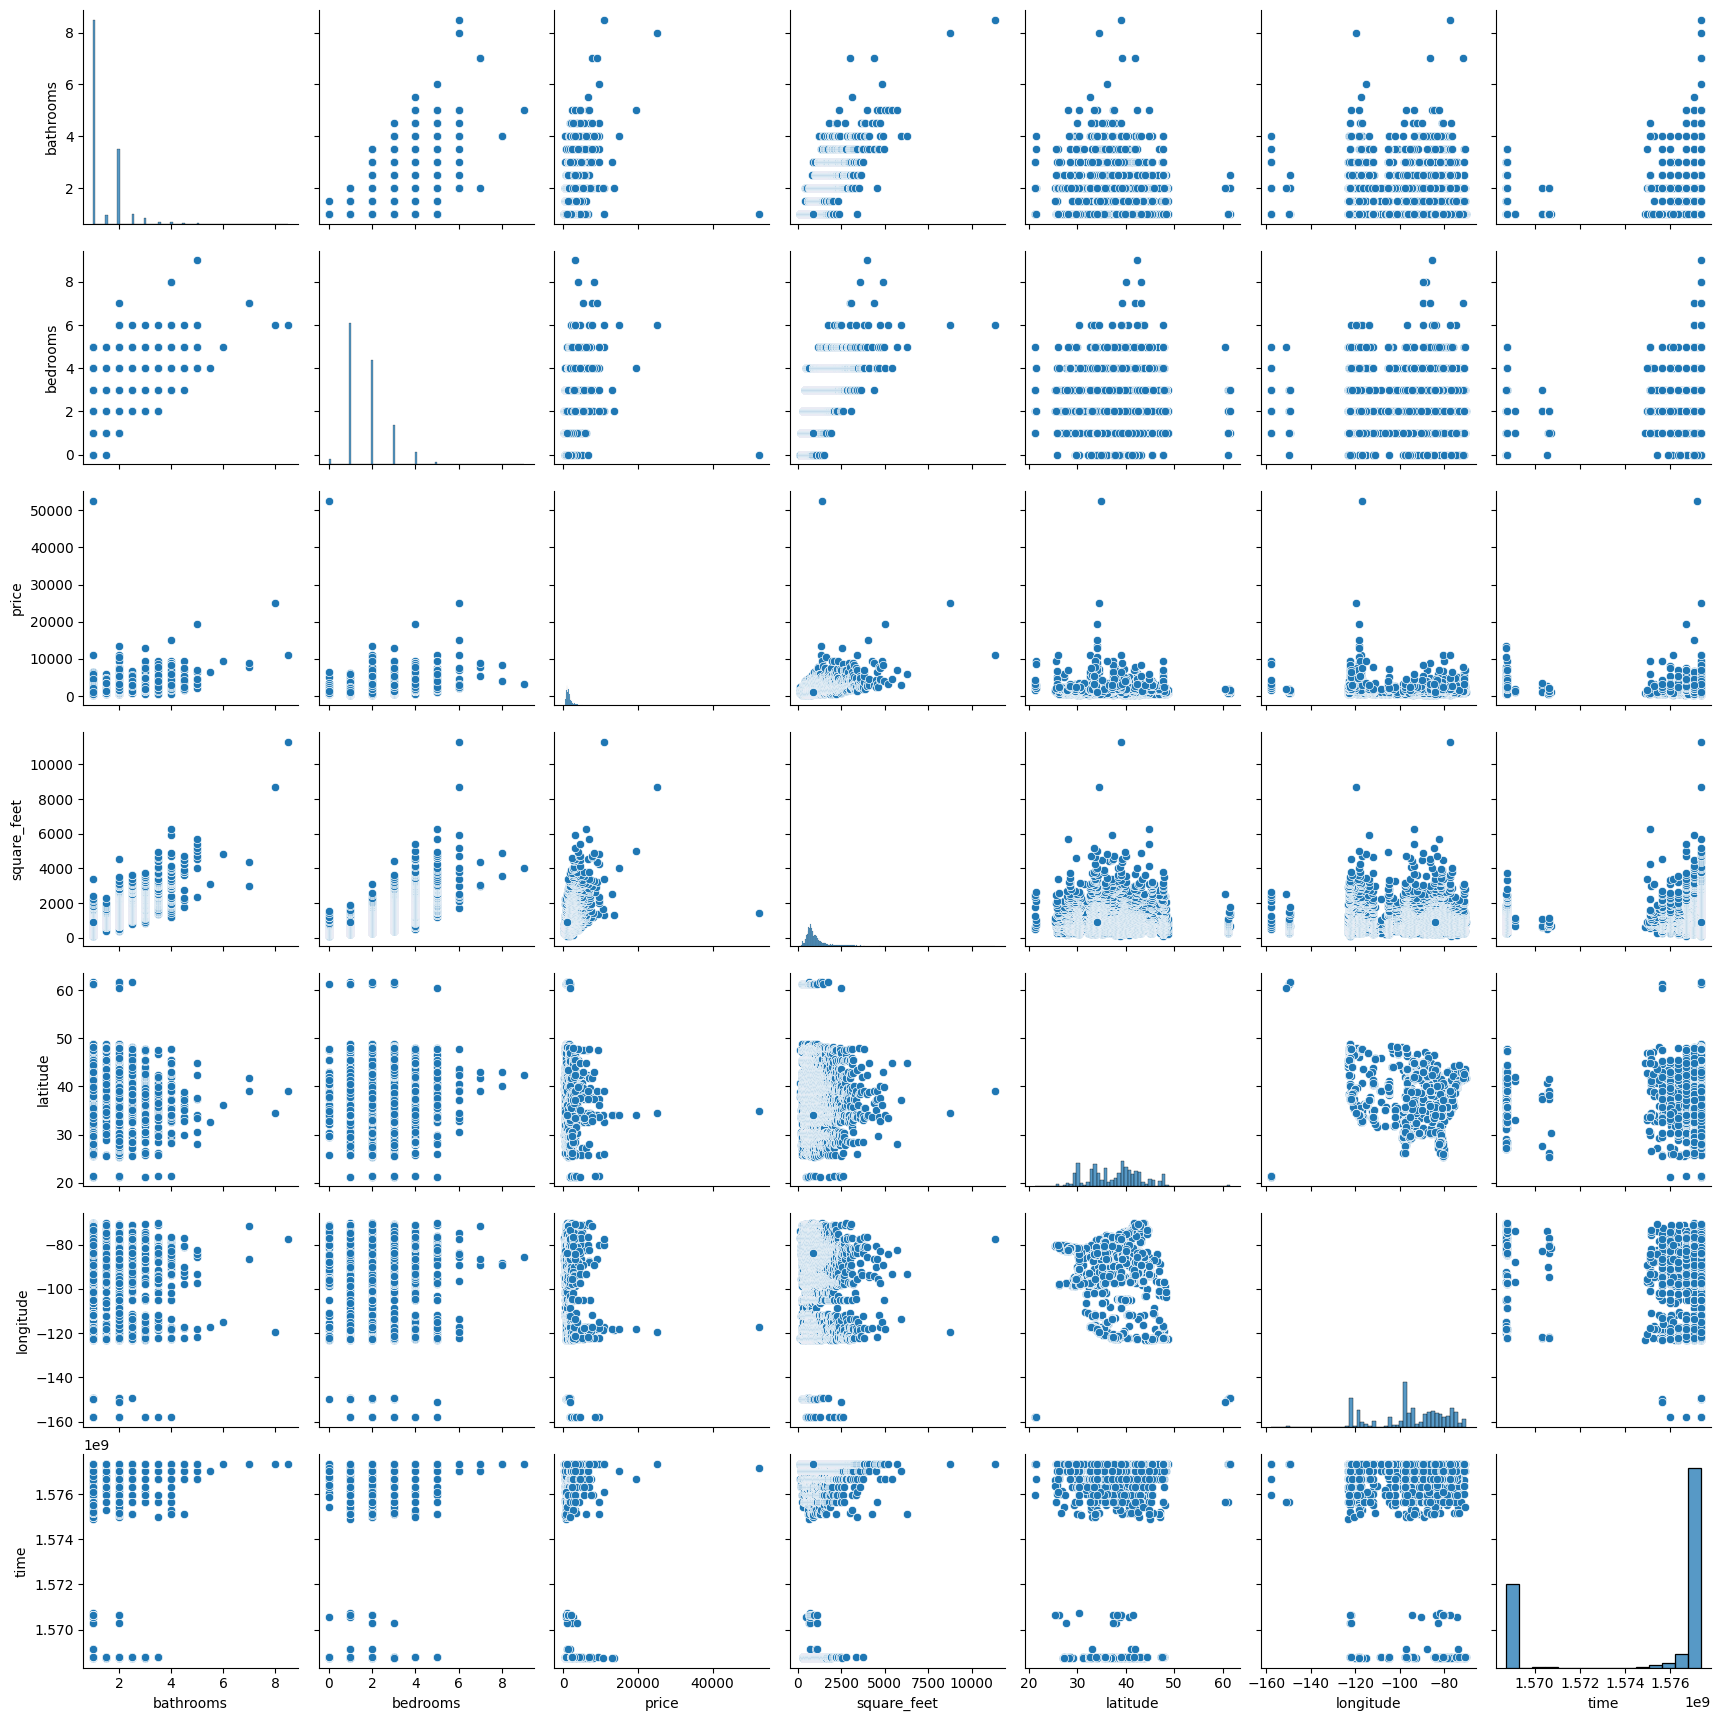

In [453]:
sns.pairplot(df,)

### Patrones notables:
- **Precio (price) vs. Tamaño (square_feet):** Hay una tendencia creciente, lo que indica que propiedades más grandes tienden a ser más caras.
- **Baños (bathrooms) y Habitaciones (bedrooms):** Hay una relación escalonada, lo cual es lógico porque más habitaciones suelen significar más baños.
- **Ubicación (latitude y longitude):** Parece haber agrupaciones en ciertas áreas, lo que podría indicar regiones específicas con más propiedades.
- **Distribución del tiempo (time):** Se observan valores discretos o picos, lo que sugiere que el tiempo en la base de datos puede ser categórico o tener registros en momentos específicos.

### Posibles problemas:

- **Distribuciones sesgadas:** Algunas variables, como price y square_feet, muestran una concentración fuerte en valores más bajos.
- **Outliers:** Se pueden ver valores extremos en price y square_feet, lo que puede afectar modelos predictivos.
- **No linealidad:** Algunas relaciones no parecen ser lineales, lo que significa que un modelo lineal simple podría no capturar bien la relación entre variables.

## Matriz de Correlación

<Axes: >

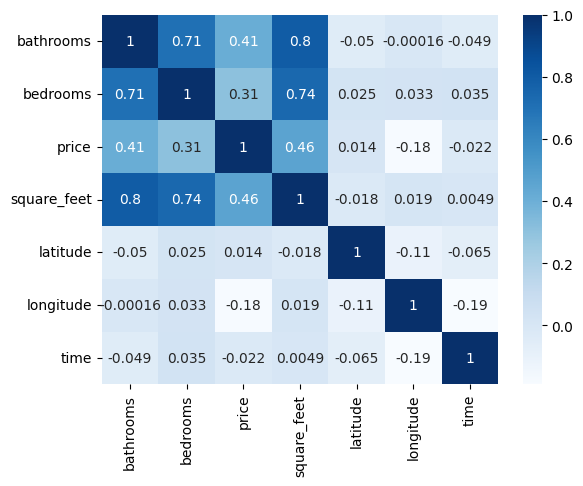

In [454]:
df_numerico = df[columnas_numericas]
corr = df_numerico.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

### Análisis de correlaciones
Relaciones fuertes

- bathrooms y square_feet (0.80) → Propiedades más grandes tienden a tener más baños.
- bedrooms y square_feet (0.74) → Más habitaciones generalmente significan más área construida.
- bathrooms y bedrooms (0.71) → Propiedades con más habitaciones suelen tener más baños.

Relaciones moderadas

- price y square_feet (0.46) → A mayor tamaño, mayor precio, aunque no es una relación completamente lineal.
- price y bathrooms (0.41) → Más baños pueden indicar propiedades más caras, pero no es la variable más influyente.
- price y bedrooms (0.31) → Similar a la anterior, aunque menos significativa.

Correlaciones débiles o negativas

- latitude y longitude tienen poca correlación con price, lo que sugiere que la ubicación geográfica no está reflejada directamente en el precio (puede haber otras variables ocultas).
- time no parece estar fuertemente relacionado con ninguna variable, lo que sugiere que no tiene un impacto directo en otras características.

- Se propone trabajar las variables bathrooms y bedrooms por separado ya que contienen información importante para el cliente, modelos como LASSO pueden excluirlas en caso de ser necesario

### Ahora, se estudiará la variable categórica Amenities

amenities
Parking               3708
noamenities           3466
Dishwasher            3248
Pool                  3218
Refrigerator          3107
Patio/Deck            2459
Cable or Satellite    1662
Storage               1526
Gym                   1469
Internet Access       1431
Clubhouse             1311
Garbage Disposal      1200
Washer Dryer          1076
Fireplace             1065
Playground             778
AC                     659
Elevator               636
Tennis                 481
Gated                  468
Wood Floors            356
Hot Tub                342
Basketball             316
TV                     206
View                   149
Doorman                 27
Alarm                   23
Golf                    23
Luxury                  11
Name: count, dtype: int64


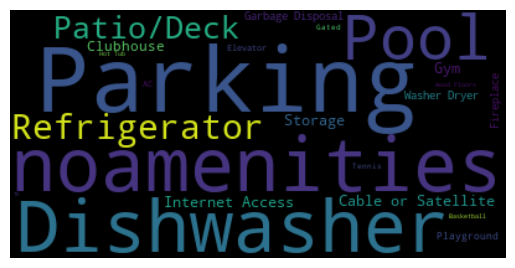

In [455]:
# Teniendo en cuenta que hay 2254 tipos de amenities, 
# se usará un wordcloud para contar el total de amenities de cada tipo entre: Refrigerator, Dishwasher, elevator, etc.

# Tipos de amenities de manera individual
text = df['amenities'].str.split(',').explode()
print(text.value_counts())

# word cloud
wordcloud_data = text.value_counts().to_dict()
wordcloud = WordCloud().generate_from_frequencies(wordcloud_data)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### se convertirán las variables categóricas amenities, has_photo y pets_allowed a numéricas mediante variables dummies

In [456]:
 # Crear variables dummies a partir de los valores separados por comas
 dummies = df['amenities'].str.get_dummies(sep=',')
    
# Concatenar las nuevas columnas al DataFrame original
df = pd.concat([df, dummies], axis=1)
df = df.drop(['amenities'],axis=1)

df.head()

,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,address,cityname,state,latitude,...,Playground,Pool,Refrigerator,Storage,TV,Tennis,View,Washer Dryer,Wood Floors,noamenities
2,1.0,0.0,Thumbnail,petsunknown,1390,107,addressunknown,Arlington,VA,38.8910,...,0,0,0,0,0,0,0,0,0,1
3,1.0,0.0,Thumbnail,petsunknown,925,116,1717 12th Avenue,Seattle,WA,47.6160,...,0,0,0,0,0,0,0,0,0,1
5,1.0,0.0,Thumbnail,petsunknown,2475,130,350 West 50th St,Manhattan,NY,40.7629,...,0,1,0,1,0,0,0,0,0,0
8,1.0,0.0,Thumbnail,petsunknown,1495,138,333 Hyde St,San Francisco,CA,37.7599,...,0,0,1,0,0,0,0,0,0,0
14,1.0,0.0,Thumbnail,petsunknown,1695,190,57 Taylor St,San Francisco,CA,37.7599,...,0,0,1,0,0,0,0,0,0,0


In [457]:
# Crear variables dummies a partir de los valores separados por comas
dummies = df['pets_allowed'].str.get_dummies()
    
# Concatenar las nuevas columnas al DataFrame original
df = pd.concat([df, dummies], axis=1)
df = df.drop(['pets_allowed'],axis=1)

df.head()

,bathrooms,bedrooms,has_photo,price,square_feet,address,cityname,state,latitude,longitude,...,TV,Tennis,View,Washer Dryer,Wood Floors,noamenities,Cats,"Cats,Dogs",Dogs,petsunknown
2,1.0,0.0,Thumbnail,1390,107,addressunknown,Arlington,VA,38.8910,-77.0816,...,0,0,0,0,0,1,0,0,0,1
3,1.0,0.0,Thumbnail,925,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,...,0,0,0,0,0,1,0,0,0,1
5,1.0,0.0,Thumbnail,2475,130,350 West 50th St,Manhattan,NY,40.7629,-73.9885,...,0,0,0,0,0,0,0,0,0,1
8,1.0,0.0,Thumbnail,1495,138,333 Hyde St,San Francisco,CA,37.7599,-122.4379,...,0,0,0,0,0,0,0,0,0,1
14,1.0,0.0,Thumbnail,1695,190,57 Taylor St,San Francisco,CA,37.7599,-122.4379,...,0,0,0,0,0,0,0,0,0,1


In [458]:
df.has_photo.map({"Yes":1,"Thumbnail":1,"No":0})
df = df.astype({"has_photo": bool})
df['has_photo'] = df['has_photo'].astype(int)
print(df.info(verbose=True))

df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 9883 entries, 2 to 9999
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bathrooms           9883 non-null   float64
 1   bedrooms            9883 non-null   float64
 2   has_photo           9883 non-null   int64  
 3   price               9883 non-null   int64  
 4   square_feet         9883 non-null   int64  
 5   address             9883 non-null   object 
 6   cityname            9883 non-null   object 
 7   state               9883 non-null   object 
 8   latitude            9883 non-null   float64
 9   longitude           9883 non-null   float64
 10  source              9883 non-null   object 
 11  time                9883 non-null   int64  
 12  AC                  9883 non-null   int64  
 13  Alarm               9883 non-null   int64  
 14  Basketball          9883 non-null   int64  
 15  Cable or Satellite  9883 non-null   int64  
 16  Clubhouse  

,bathrooms,bedrooms,has_photo,price,square_feet,address,cityname,state,latitude,longitude,...,TV,Tennis,View,Washer Dryer,Wood Floors,noamenities,Cats,"Cats,Dogs",Dogs,petsunknown
2,1.0,0.0,1,1390,107,addressunknown,Arlington,VA,38.8910,-77.0816,...,0,0,0,0,0,1,0,0,0,1
3,1.0,0.0,1,925,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,...,0,0,0,0,0,1,0,0,0,1
5,1.0,0.0,1,2475,130,350 West 50th St,Manhattan,NY,40.7629,-73.9885,...,0,0,0,0,0,0,0,0,0,1
8,1.0,0.0,1,1495,138,333 Hyde St,San Francisco,CA,37.7599,-122.4379,...,0,0,0,0,0,0,0,0,0,1
14,1.0,0.0,1,1695,190,57 Taylor St,San Francisco,CA,37.7599,-122.4379,...,0,0,0,0,0,0,0,0,0,1
15,1.0,1.0,1,1560,200,addressunknown,New Bern,NC,35.0847,-77.0609,...,0,0,0,0,0,0,0,1,0,0
16,1.0,1.0,1,1560,200,180 Moonlight Lake Drive,New Bern,NC,35.0960,-77.0272,...,0,0,0,0,0,0,0,1,0,0
17,1.0,1.0,1,1000,200,addressunknown,Spring,TX,30.0871,-95.4685,...,0,0,0,0,0,1,0,0,0,1
18,1.0,1.0,1,950,200,545 Georgia St 717-723 Sutter St,Vallejo,CA,38.1172,-122.2313,...,0,0,0,0,0,1,0,0,0,1
19,1.0,1.0,1,625,200,addressunknown,Marietta,GA,33.9649,-84.5107,...,0,0,0,0,0,0,0,0,0,1


### Ahora, se tratarán los valores atípicos

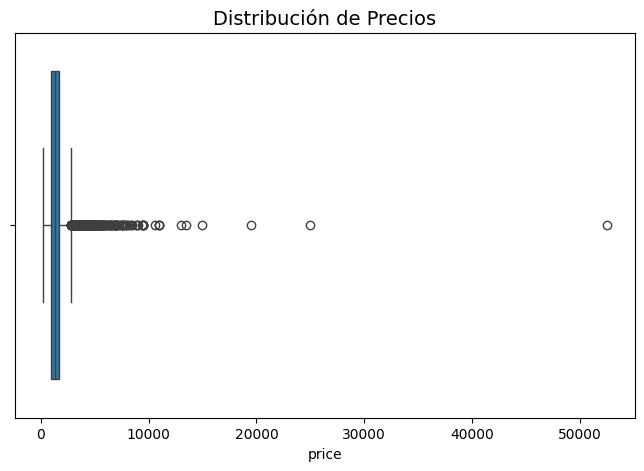

In [459]:
# Ajustar el tamaño del gráfico
plt.figure(figsize=(8, 5))

# Crear el boxplot
sns.boxplot(x=df['price'])

# Agregar título
plt.title("Distribución de Precios", fontsize=14)

# Mostrar el gráfico
plt.show()


- Teniendo en cuenta que nuestra variable de respuesta será el precio, se procede a eliminar los outliers y/o valores atípicos

In [460]:
# Calcular el primer y tercer cuartil (Q1 y Q3)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calcular el rango intercuartil (IQR)
IQR = Q3 - Q1

# Definir límites para detección de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_sinoutliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Mostrar nueva cantidad de datos
print(f"Cantidad de datos antes: {len(df)}")
print(f"Cantidad de datos después de eliminar outliers: {len(df_sinoutliers)}")

Cantidad de datos antes: 9883
Cantidad de datos después de eliminar outliers: 9274


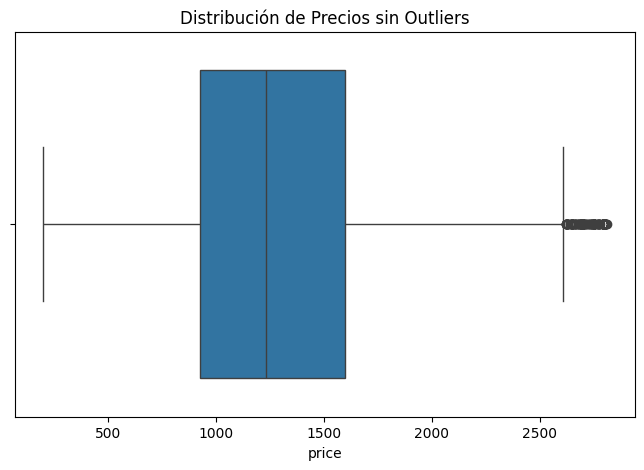

In [461]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_sinoutliers['price'])
plt.title("Distribución de Precios sin Outliers")
plt.show()

### Aún quedan algunos outliers ya que se definió el umbral teniendo en cuenta que:
- 1.5 × IQR (valor estándar): Se usa en la mayoría de los análisis para detectar outliers.
- 1.3 × IQR (más estricto): Filtra más valores extremos, pero puede eliminar datos importantes.
- 1.0 × IQR (muy estricto): Solo mantiene los valores más centrales y elimina casi todos los extremos.
- 2.0 × IQR (más relajado): Permite más variabilidad y solo elimina valores realmente extremos.

In [462]:
df_sinoutliers.shape

(9274, 44)

In [463]:
df_sinoutliers.head(10)

,bathrooms,bedrooms,has_photo,price,square_feet,address,cityname,state,latitude,longitude,...,TV,Tennis,View,Washer Dryer,Wood Floors,noamenities,Cats,"Cats,Dogs",Dogs,petsunknown
2,1.0,0.0,1,1390,107,addressunknown,Arlington,VA,38.8910,-77.0816,...,0,0,0,0,0,1,0,0,0,1
3,1.0,0.0,1,925,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,...,0,0,0,0,0,1,0,0,0,1
5,1.0,0.0,1,2475,130,350 West 50th St,Manhattan,NY,40.7629,-73.9885,...,0,0,0,0,0,0,0,0,0,1
8,1.0,0.0,1,1495,138,333 Hyde St,San Francisco,CA,37.7599,-122.4379,...,0,0,0,0,0,0,0,0,0,1
14,1.0,0.0,1,1695,190,57 Taylor St,San Francisco,CA,37.7599,-122.4379,...,0,0,0,0,0,0,0,0,0,1
15,1.0,1.0,1,1560,200,addressunknown,New Bern,NC,35.0847,-77.0609,...,0,0,0,0,0,0,0,1,0,0
16,1.0,1.0,1,1560,200,180 Moonlight Lake Drive,New Bern,NC,35.0960,-77.0272,...,0,0,0,0,0,0,0,1,0,0
17,1.0,1.0,1,1000,200,addressunknown,Spring,TX,30.0871,-95.4685,...,0,0,0,0,0,1,0,0,0,1
18,1.0,1.0,1,950,200,545 Georgia St 717-723 Sutter St,Vallejo,CA,38.1172,-122.2313,...,0,0,0,0,0,1,0,0,0,1
19,1.0,1.0,1,625,200,addressunknown,Marietta,GA,33.9649,-84.5107,...,0,0,0,0,0,0,0,0,0,1


In [464]:
df_sinoutliers.to_csv("datos_filtrados.csv", index=True)